In [85]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from io import BytesIO
from PIL import Image

In [32]:
papers_path = "C:\\Users\\marti\\Dropbox\\2. Work\\7. KCL ML Research\\Figure 3 Papers Data 20200206.xlsx"
criteria_path = "C:\\Users\\marti\\Dropbox\\2. Work\\7. KCL ML Research\\Figure 4 Criteria Data 20200206.xlsx"

papers_df = pd.read_excel(papers_path)
criteria_df = pd.read_excel(criteria_path)

In [33]:
# replace the column row
criteria_df = criteria_df.transpose()
criteria_df = criteria_df.reset_index() # transpose messes up the index 
criteria_df.columns = criteria_df.iloc[0] # rename the column labels
criteria_df = criteria_df.drop(criteria_df.index[0]) # remove the duplicate labels in first row


In [34]:
criteria_df.columns

Index(['Criteria', 'Yes', 'No', 'Not applicable'], dtype='object', name=0)

In [35]:
# drop the results row
#criteria_df.iloc[pd.RangeIndex(len(criteria_df)).drop(0)]
criteria_df.head()

,Criteria,Yes,No,Not applicable
1,16. Report performance measures (with CIs),6,12,0
2,15b. Explain how to the use the model,0,18,0
3,15a.* Present the full prediction model and code,1,17,0
4,"14b. If done, report the unadjusted predictor ...",2,0,16
5,14a. Specify the number of participants and ou...,13,4,1


In [36]:
# there's probably a better way of doing this in a for loop
paper_yeses = papers_df["Yes"].tolist()
paper_noes = papers_df["No"].tolist()
paper_NAs = papers_df["Not applicable"].tolist()
paper_label = papers_df["Paper"].tolist()

criteria_yeses = criteria_df["Yes"].tolist()
criteria_noes = criteria_df["No"].tolist()
criteria_NAs = criteria_df["Not applicable"].tolist()
criteria_label = criteria_df["Criteria"].tolist()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


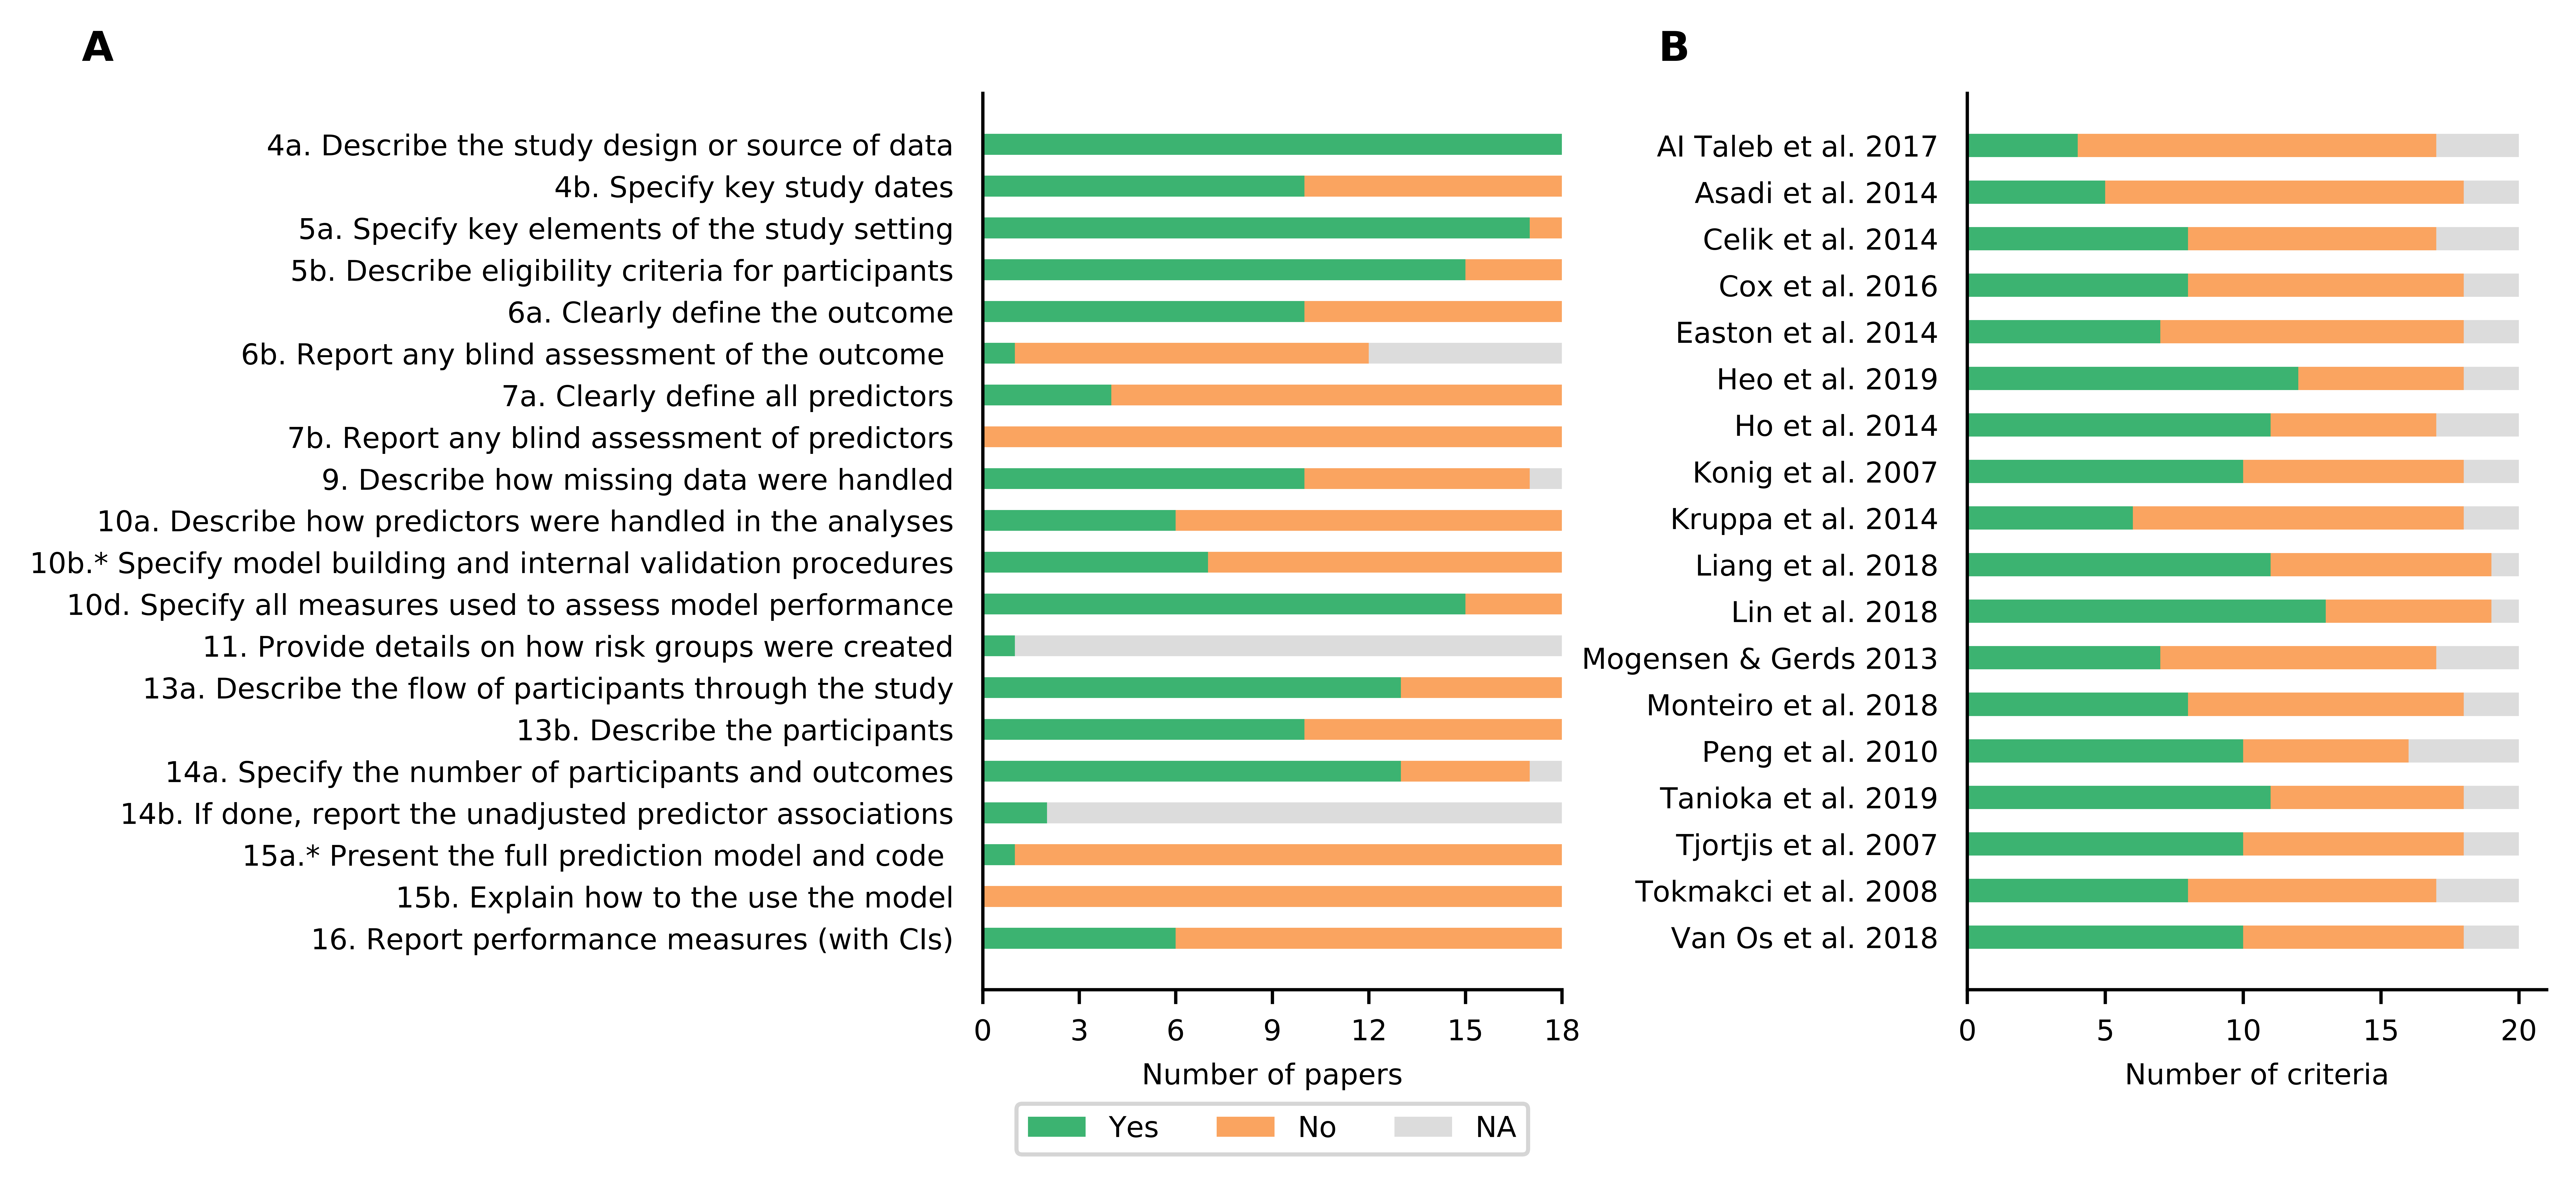

In [90]:
# Set some style parameters
font = {'family': 'sans-serif', 'weight':'normal','size':7}
plt.rc('font',**font)
dpi = 1200

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey= False, 
                               sharex= False, figsize=(6.8,4), dpi=dpi)

plt.subplots_adjust(wspace = 0.7) # spread the two plots out
colors = ['#3CB371', '#FAA460', '#DCDCDC'] # lightgreen, lightorange, lightgrey
width = 0.5 # for individual bars

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# variables for saving 
time_tag = 'Figure 3 '+datetime.now().strftime("%Y%m%d%H%M%S")
file_name_eps = time_tag+'.eps'
file_name_png = time_tag+'.png'
file_name_tif = time_tag+'.tif'
file_name_svg = time_tag+'.svg'

##### LHS chart -- criteria

# Set dimensions
N = len(criteria_yeses)
ind_left = np.arange(N)    # the x locations for the groups
margin_left = np.zeros(len(criteria_label))

# Draw the graph
ax0.barh(y = ind_left, width = criteria_yeses, height = width, color = colors[0])
margin_left = np.array(criteria_yeses) # lift the next bars up

ax0.barh(y = ind_left, width = criteria_noes, height = width, color = colors[1], left=margin_left)
margin_left += np.array(criteria_noes) # lift the next bars up

ax0.barh(y = ind_left, width = criteria_NAs, height = width, color = colors[2], left=margin_left)

# Format the axes
ax0.set_yticks(ind_left)
ax0.set_yticklabels(criteria_label)
ax0.yaxis.set_ticks_position('none')

ax0.set_xlabel('Number of papers')
ax0.set_xticks(np.arange(0, 18+1, 3))

##### RHS chart -- papers

# Set dimensions
N = len(paper_yeses)
ind_right = np.arange(N)    # the x locations for the groups
margin_right = np.zeros(len(paper_label))


# draw the graph
r1 = ax1.barh(y = ind_right, width = paper_yeses, height = width, color = colors[0])
margin_right = np.array(paper_yeses) # lift the next bars up

r2 = ax1.barh(y = ind_right, width = paper_noes, height = width, color = colors[1], left=margin_right)
margin_right += np.array(paper_noes) # lift the next bars up

r3 = ax1.barh(y = ind_right, width = paper_NAs, height = width, color = colors[2], left=margin_right)

# Format the axes
ax1.set_yticks(ind_right)
ax1.set_yticklabels(paper_label)
ax1.yaxis.set_ticks_position('none')


ax1.set_xlabel('Number of criteria')
ax1.set_xticks(np.arange(0, 20+1, 5))

# This is ax0 to be more central
ax0.legend((r1[0],r2[0],r3[0]), ('Yes', 'No', "NA"), 
           loc = 'lower center', bbox_to_anchor = (0.5,-0.2),ncol=3)

# set A & B markers 
ax0.text(-28,21,'A',fontsize='10', weight='bold')
ax0.text(21,21,'B',fontsize='10', weight='bold')

# Save the image in memory in PNG format
# png1 = BytesIO()

fig.savefig(file_name_eps, format= 'eps', dpi=dpi, bbox_inches='tight')
fig.savefig(file_name_png, format= 'png', dpi=dpi, bbox_inches='tight')
fig.savefig(file_name_svg,format='svg',dpi=dpi, bbox_inches='tight')
# fig.savefig(plot_name_tif, dpi=dpi)

# Load into Pillow image library
png_version = Image.open(file_name_png)
png_version.load()

# png_version.save(file_name_tif)
#png1.close()

plot_file = plt.gcf() # capture the file before showing erases it
plt.show()

In [65]:
# Conver png to tiff


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


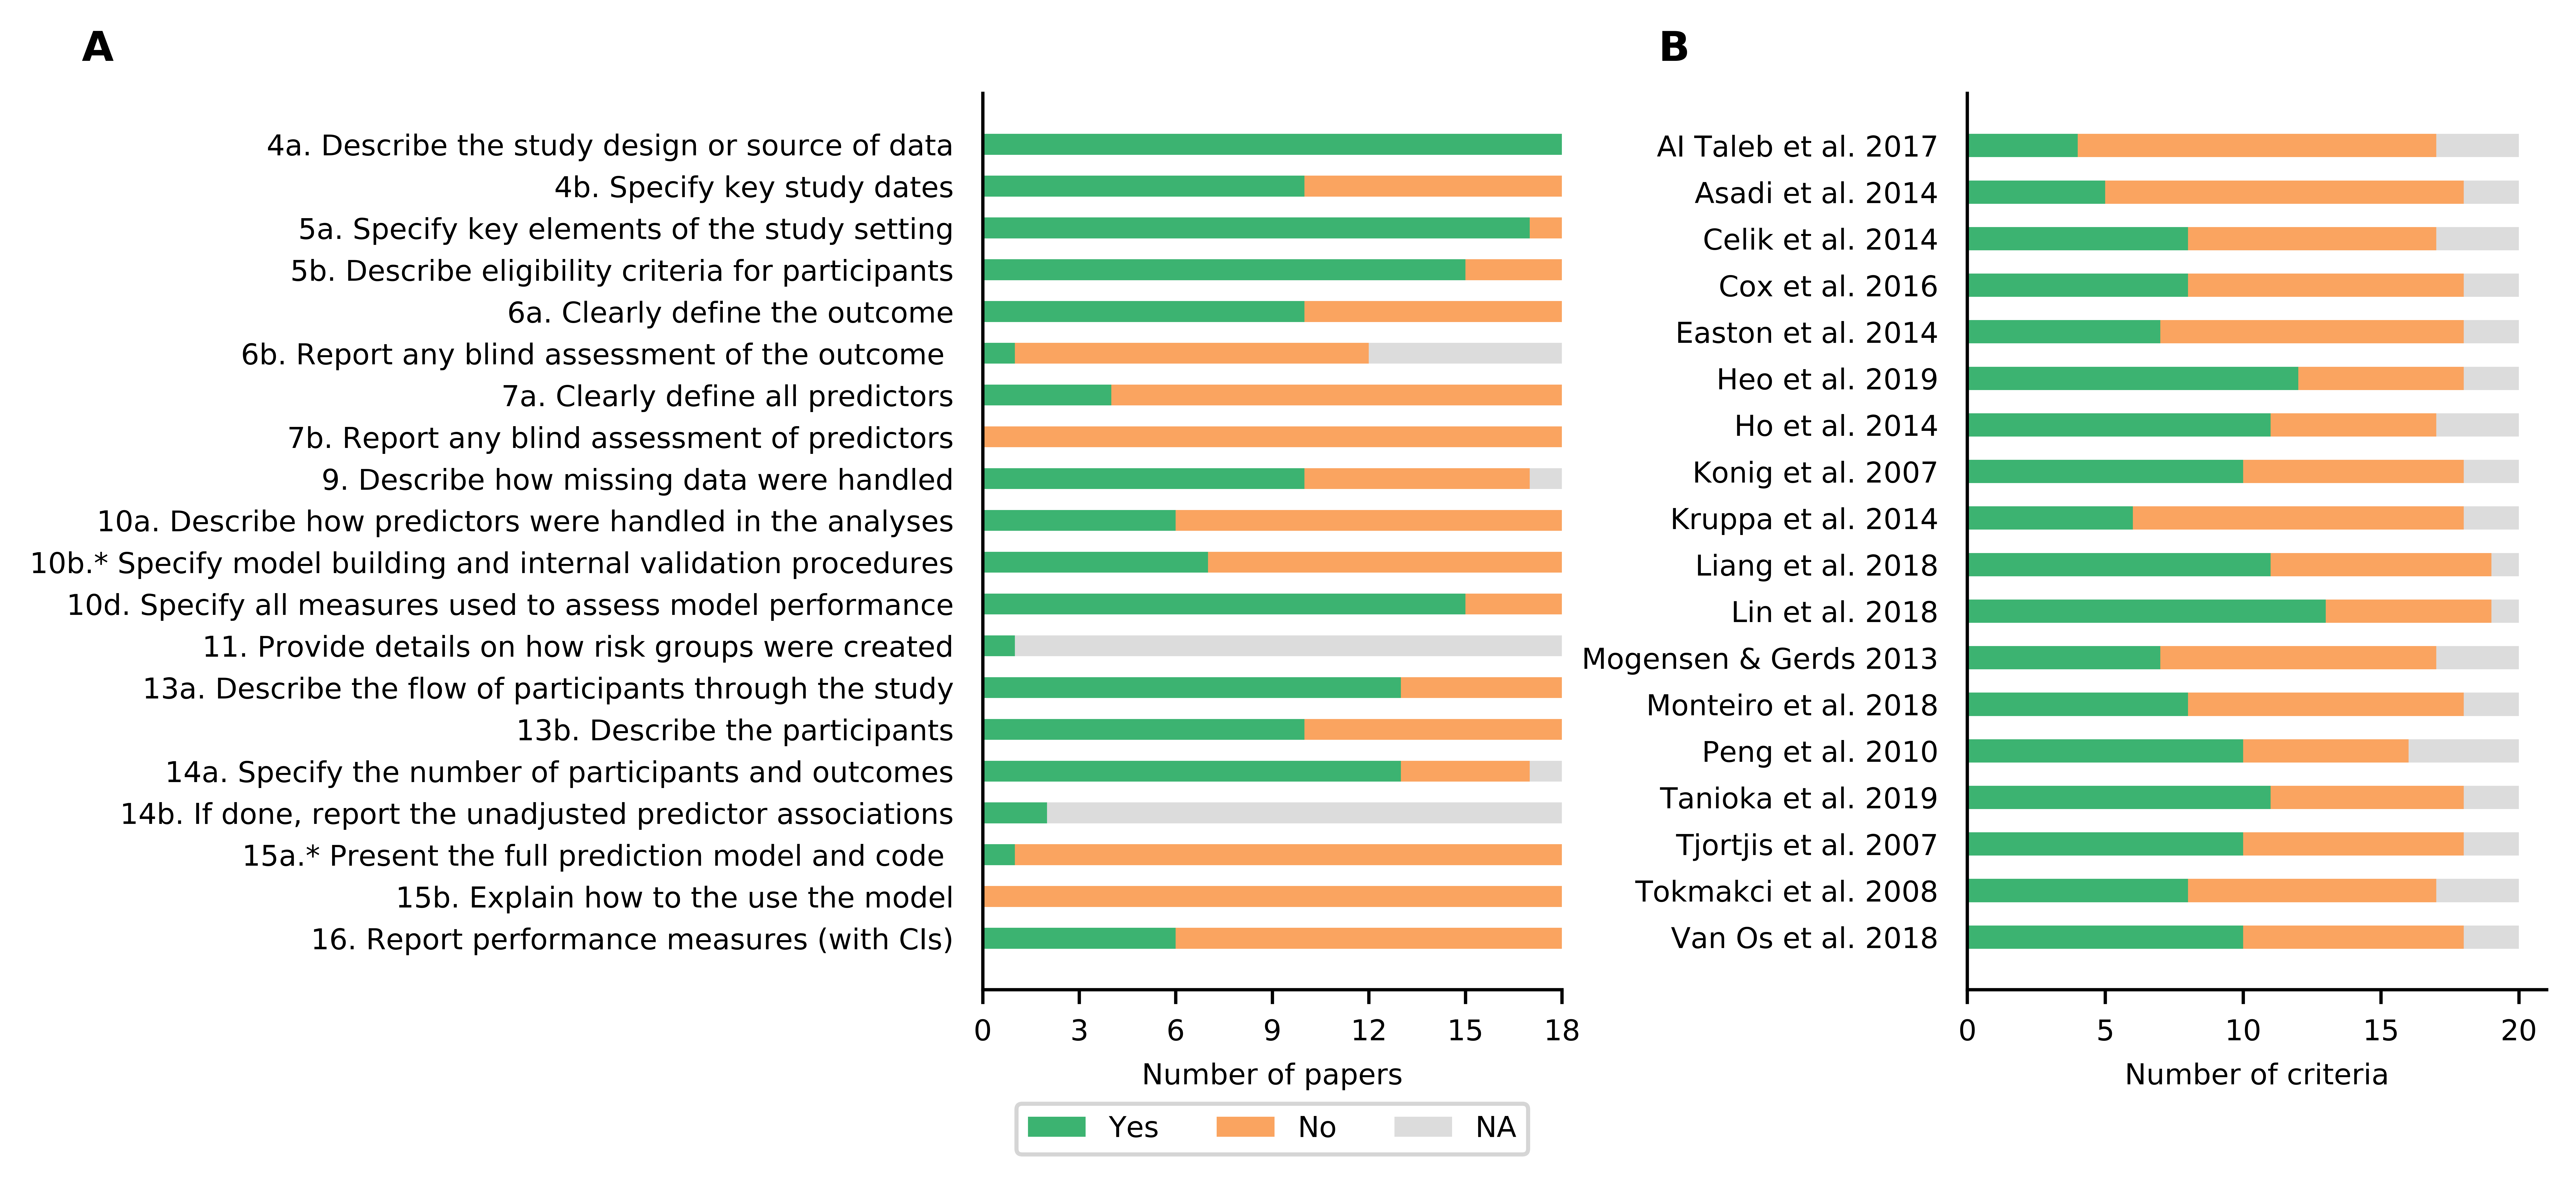

In [76]:
plot_file